![p2_a](./img/p2_a.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

![p2_b](./img/p2_b.png)

In [2]:
loadxs = lambda i: np.genfromtxt(f"./mnist_data/200_{i}s.csv", delimiter=",")

xs1 = loadxs(1)
xs2 = loadxs(2)
xs3 = loadxs(3)

In [3]:
xs2.shape

(784, 200)

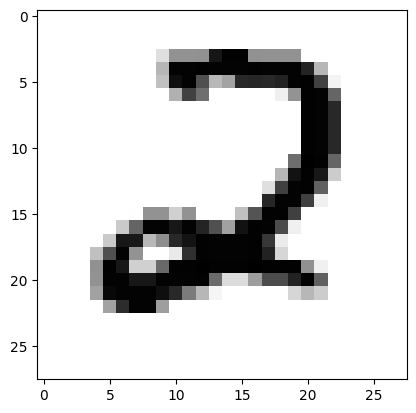

In [4]:
plt.imshow(xs2[:,0].reshape((28,28)),cmap='gray')

![p2_c](./img/p2_c.png)

In [5]:
xs = np.block([xs1, xs2, xs3])
xs.shape

(784, 600)

![p2_d](./img/p2_d.png)

In [6]:
xmean = np.mean(xs, axis=1)
xmean.shape

(784,)

![p2_e](./img/p2_e.png)

In [7]:
Xs = xs - np.outer(xmean, np.ones(600))
Xs.shape

(784, 600)

![p2_f](./img/p2_f.png)

In [8]:
n = xs.shape[1]
cov = (Xs @ Xs.T) / (n - 1)
cov.shape

(784, 784)

![p2_g](./img/p2_g.png)

In [9]:
lambdas, V = np.linalg.eigh(cov)
D = np.diag(lambdas)

In [10]:
V.shape

(784, 784)

In [11]:
D.shape

(784, 784)

![p2_h](./img/p2_h.png)

Since the eigenvalues in D have to be in increasing order, we can just extract the last two values

In [12]:
eval_1 = D[783][-1]
eval_2 = D[782][-2]

In [13]:
eval_1

6.625891531753323

In [14]:
eval_2

5.116375890772888

![p2_i](./img/p2_i.png)

In [15]:
vx = V[:,783]
vy = V[:,782]

In [16]:
vx.shape

(784,)

In [17]:
vy.shape

(784,)

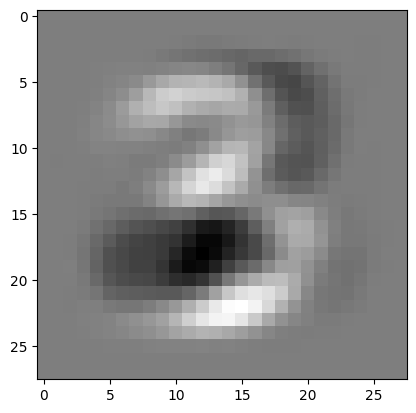

In [18]:
plt.imshow(vx.reshape((28,28)), cmap='gray')
plt.imshow(vy.reshape((28,28)), cmap='gray')

![p2_j](./img/p2_j.png)

In [19]:
px = np.dot(vx, Xs)
py = np.dot(vy, Xs)

In [20]:
len(px)

600

In [21]:
len(py)

600

![p2_k](./img/p2_k.png)

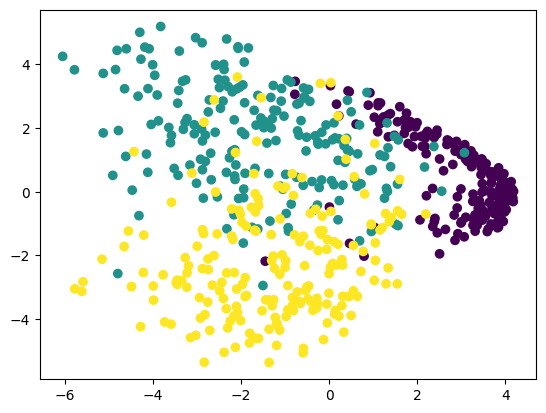

In [22]:
col = np.block([0 * np.ones(200), 1 * np.ones(200), 2 * np.ones(200)])
plt.scatter(px, py, c=col)